<a href="https://colab.research.google.com/github/seungmei/ESAA_23_2/blob/main/13%EC%A3%BC%EC%B0%A8%EC%9B%94%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#13주차월과제
##파이썬 머신러닝 완벽가이드 409~427쪽
### Chapter 7. 군집화
#### 1. K-평균 알고리즘 이해
K-평균은 군집화Clustering에서 가장 일반적으로 사용되는 알고리즘. 군집 중심점centroid라는 특정한 임의의 지점을 선택해 해당 중심에 가장 가까운 포인트들을 선택하는 군집화 기법.
- 과정: centroid가 선택된 포인트의 평균 지점 이동 > 이동된 중심점에서 다시 가까운 포인트를 선택 후 평균 지점으로 이동.
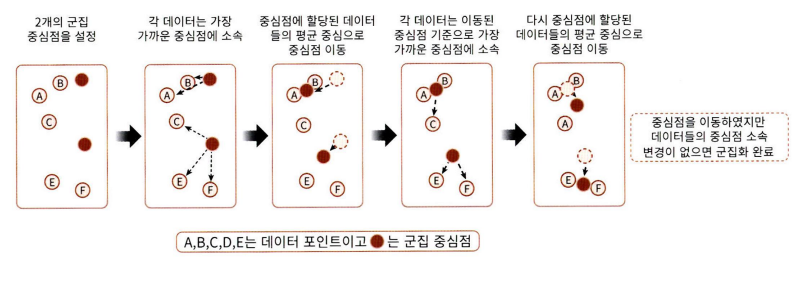


##### 사이킷런 KMeans 클래스 소개

In [ ]:
#class sklearn.cluster.KMeans(n_clusters=8, init='k-mean++', n_init=10, max_iter=10, tol=0.0001, precompute_distances='auto', verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto')

** 중요 파라미터 **
- n_clusters: 군집화할 개수, 군집 중심점의 개수.
- init: 초기에 군집 중심점의 좌표를 설정할 방식. 일반적으로 k-means++로.
- max_iter: 최대 반복 횟수. 이 횟수 이전에 모든 데이터의 중심점 이동이 없으면 종료.

**KMeans는 fit 또는 fit_transform 메서드를 이용해 수행**

** 주요 속성 정보 **
- labels_: 각 데이터 포인트가 속한 군집 중심점 레이블.
- cluster_centers_:각 군집 중심점 좌표. 이를 이용하면 군집 중심점 좌표가 어디인지 시각화 가능.

##### K-평균을 이용한 붓꽃 데이터 세트 군집화

In [22]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 더 편리한 데이터 핸들링을 위해 df로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


붓꽃 데이터 세트를 3개 그룹으로 군집화 해보자.


In [23]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisDF)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [24]:
print(kmeans.labels_)
### 각 레코드가 첫번째, 두번째, 세번째 군집에 속함을 알 수 있음.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [25]:
irisDF['target'] = iris.target
irisDF['cluster'] = kmeans.labels_
iris_result = irisDF.groupby(['target', 'cluster'])['sepal_length'].count()
print(iris_result)
### 분류 타깃이 0값인 데이터는 1번 군집으로 잘 그루핑.
### target 1 값 데이터는 2개만 2번 군집으로 그루핑.
### 나머지 48개는 모두 0번 군집으로 그루핑.
### target 2값 데이터는 0번 군집에 14개, 2번 군집에 36개로 분산돼 그루핑.

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64


붓꽃 데이터 세트의 군집화를 시각화해보자.
2차원 평면상에서 개별 데이터의 군집화를 시각적으로 표현하려고 하는데, 데이터 세트의 속성이 4개이므로 2차원 평면에 적합치 않아 PCA를 이용해 4개의 속성을 2개로 차원 축소한 뒤에 X좌표, Y좌표로 개별 데이터를 표현하도록 하자.

In [26]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisDF['pca_x'] = pca_transformed[: , 0]
irisDF['pca_y'] = pca_transformed[:, 1]
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949


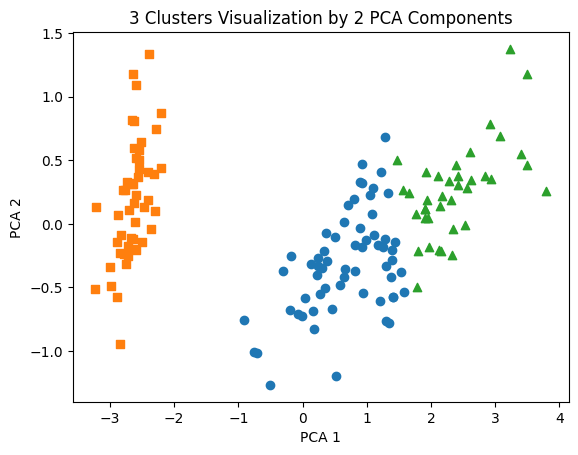

In [27]:
# 군집 값이 0, 1, 2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisDF[irisDF['cluster'] == 0].index
marker1_ind = irisDF[irisDF['cluster'] == 1].index
marker2_ind = irisDF[irisDF['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y 값 추출. o, s, ^로 마커 표시
plt.scatter(x=irisDF.loc[marker0_ind, 'pca_x'], y=irisDF.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisDF.loc[marker1_ind, 'pca_x'], y=irisDF.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind, 'pca_x'], y=irisDF.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()
### Cluster 0 과 1의 경우 속성의 위치 자체가 명확히 분리되기 어려운 부분 존재.

##### 군집화 알고리즘 테스트를 위한 데이터 생성
- make_blobs(): 개별 군집의 중심점과 표준편차 제어 기능 추가. tuple로 반환, make_classification(): 노이즈를 포함한 데이터를 만드는데 유용하게 사용 가능.  API
- make_blobs()
  -파라미터
    -n_samples: 생성할 총 데이터의 개수
    -n_features: 데이터의 피처 개수. 시각화일 경우, 주로 x y좌표상에 표현
    -centers: 군집의 개수 또는 개별 군집 중심점의 좌표.
    -cluster_std: 생성될 군집 데이터의 표준 편차

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

# y target값의 분포를 확인
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)
### 피처 데이터 세트 X는 200개의 레코드와 2개의 피처
### 군집 타깃 데이터 세트 y는 200,
### 3개의 cluster값 [0, 1, 2]. 67, 67, 66개로 균일 구성

(200, 2) (200,)
[0 1 2] [67 67 66]


In [29]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y
clusterDF.head(3)

,ftr1,ftr2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


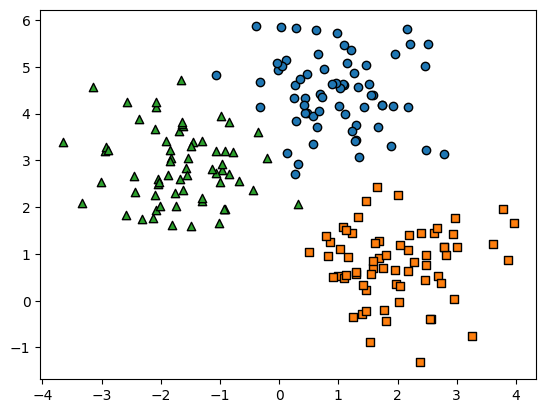

In [30]:
target_list = np.unique(y)
# 각 타깃별 산점도의 마커 값.
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']
#3개의 군집 영역으로 구분한 데이터 세트를 생성했으므로 target_list는 [0, 1, 2]
#target==0, target==1, target==2 로 scatter plot을 marker별로 생성.
for target in target_list:
  target_cluster = clusterDF[clusterDF['target']==target]
  plt.scatter(x=target_cluster['ftr1'], y=target_cluster['ftr2'], edgecolor='k', marker=markers[target])
plt.show()

KMeans 군집화를 수행한 뒤에 군집별로 시각화해보자.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


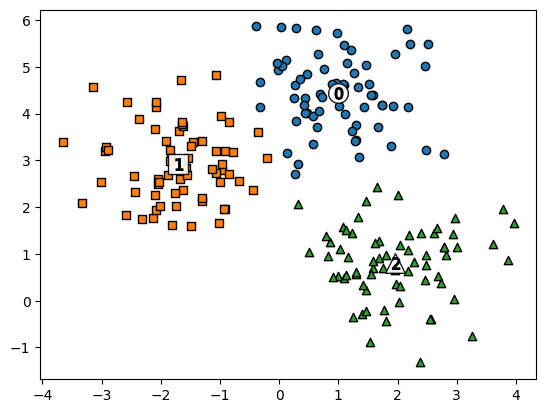

In [31]:
# KMeans 객체를 이용해 X 데이터를 K-Means 클러스터링 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
clusterDF['kmeans_label'] = cluster_labels

#cluster_centers_는 개별 클러스터의 중심 위치 좌표 시각화를 위해 추출
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

#군집된 label 유형별로 iteration 하면서 marker 별로 scatter plot 수행
for label in unique_labels:
  label_cluster = clusterDF[clusterDF['kmeans_label']==label]
  center_x_y = centers[label]
  plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])

  #군집별 중심 위치 좌표 시각화
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)

plt.show()

In [32]:
print(clusterDF.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64


#### 2. 군집 평가 Cluster Evaluation
##### 실루엣 분석의 개요 silhouette analysis
- 실루엣 분석: 각 군집 간의 거리가 얼마나 효율적으로 분리돼있는지; 다른 군집과의 거리는 떨어져 있고 동일 군집끼리는 서로 가깝게.
  - 실루엣 계수
  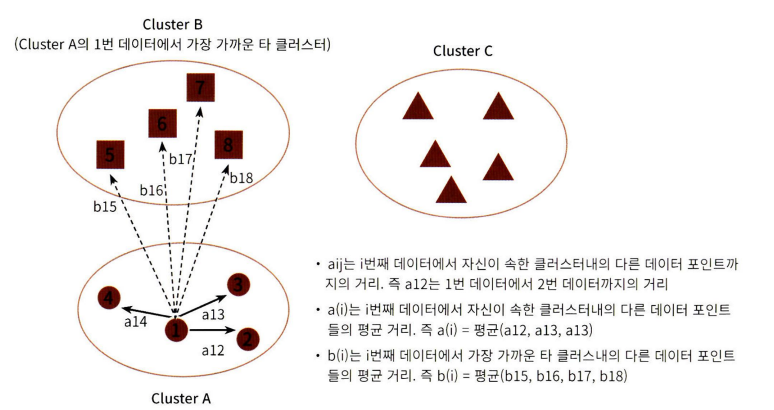

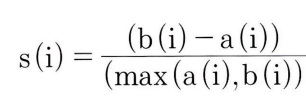
-1에서 1사이

좋은 군집화의 조건
1. 전체 실루엣 계수의 평균값이 0에서 1사이. 1에 가까울수록 good.
2. 전체 실루엣 계수의 평균값과 더불어 개별 군집의 평균값의 편차가 크지 않아야

##### 붓꽃 데이터 세트를 이용한 군집 평가

In [33]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
#실루엣 분석 평가 지표 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

iris = load_iris()
feature_names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisDF)
irisDF['cluster'] = kmeans.labels_

#iris의 모든 개별 데이터에 실루엣 계수 값을 구함.
score_samples = silhouette_samples(iris.data, irisDF['cluster'])
print('silhouette_samples() return 값의 shape', score_samples.shape)

#irisDF에 실루엣 계수 칼럼 추가
irisDF['silhouette_coeff'] = score_samples

#모든 데이터의 평균 실루엣 계수 값을 구함
average_score = silhouette_score(iris.data, irisDF['cluster'])
print('붓꽃 데이터 세트 Silhouette Analysis Score:{0:.3f}'.format(average_score))
irisDF.head(3)

silhouette_samples() return 값의 shape (150,)
붓꽃 데이터 세트 Silhouette Analysis Score:0.553


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315


In [34]:
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

##### 군집별 평균 실루엣 계수의 시각화를 통한 군집 개수 최적화 방법
- 개별 군집별로 적당히 분리된 거리를 유지하면서도 군집 내의 데이터가 서로 뭉쳐있는 경우에 k-평균의 적절한 군집 개수가 설정됐다고 판단 가능.

In [36]:
#visualize_silhouette([2, 3, 4, 5], X_features)

make_blobs() 함수를 통해 4개 군집 중심의 500개 2차원 데이터 세트를 만들고 이를 k-평균으로 군집화할 때 2개, 3개, 4개, 5개 최적의 군집 개수를 시각화.

In [38]:
# make_blobs 를 통해 군집화를 위한 4개의 군집 중심의 500개 2차원 데이터 세트 생성
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, center_box=(-10.0, 10.0), shuffle=True, random_state=1)

# 군집 개수가 2개, 3개, 4개, 5개일 때의 군집별 실루엣 계수 평균값을 시각화
#visualize_silhouette([2, 3, 4, 5], X)

In [40]:
from sklearn.datasets import load_iris
iris = load_iris()
#visualize_silhouette([2, 3, 4, 5], iris.data)